In [77]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy   as np
import seaborn as sns 

plt.style.use('dark_background')

Опис завдання Вам потрібно дослідити дані про проходження гравцями рівнів match3-ігри та виконати такі завдання:

Завдання 1
Запропонувати метрику, що описує складність рівнів, та розрахувати її.

Завдання 2
За результатами попереднього завдання розділити рівні на групи за складністю та зробити висновок про щільність розташування складних рівнів у грі.
Завдання 3
Розрахувати "воронку" проходження рівнів новим користувачем після встановлення гри.
Також ми хотіли б отримати від вас коментар щодо виконання тестового завдання. Він не повинен бути дуже великим. Нам цікаво було б дізнатися:

приблизну оцінку часу, який ви витратили виконання завдання;
коментарі щодо сформованої метрики (п1): чому дана метрика буде показовою;
чи виникали проблеми під час виконання тестового завдання.
Вхідні дані – файл plr_smpl_attempts.csv.gz, що містить лог подій за певний проміжок часу за першими 500 рівнями у грі. Файл містить чотири колонки:
uid – унікальний id гравця;
action - 'completed' для успішної спроби проходження рівня, 'failed' для неуспішної;
level — рівень, на якому сталася подія;
event_time — event_time/1000 є unix timestamp часу отримання події.



In [250]:
df = pd.read_csv('C:/Users/tuf/Downloads/plr_smpl_attempts.csv.gz', sep = ';')

Друзі, це друга частина нашого вирішення завдання. У цьому розділі я хочу побудувати ще декілька графіків, які будуть актуальні щодо опису ситуації навколо нашої гри. Давайте подивимося, як ми можемо це зробити. У минулому ноутбуці ми фактично рахували ймовірність, а в цій частині ми порахуємо шанси. Це є підвид ймовірності.

У математиці, шанси (odds) - це ставлення ймовірності (probability) події до ймовірності його неможливості (1 - probability)
Якщо ми просто використовуємо твою ідею і робимо 1 – 0.5, отримаємо 0.5. Тобто наше відношення буде 0.5 до 0.5, що дорівнює 1.
Це дасть нам правильну відповідь.
Таким чином, формула шансів (odds) - це просто інший спосіб уявлення ймовірності події у числовому вигляді,
який може бути зручнішим у деяких випадках, особливо у статистичному аналізі.
Шанси орла (odds) = 0.5 / (1 – 0.5) = 0.5 / 0.5 = 1
Це означає, що шанси випадання орла дорівнюють 1 до 1.

In [302]:
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,0,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,0,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,0,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,0,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,0,113,1512086924640


In [303]:
df['action'] = df['action'].replace('failed',0).replace('completed',1)

перемога = 1 

Якщо було 2 поразки та 2 перемоги, то шанс перемоги був би 2/2 = 1 (100%)?

np.mean([0,0,1,1]) / (1-np.mean([0,0,1,1]))
Шанси один до одного.

В цьому розділі ми за перемогу візьмемо не 0, а 1. Та розрахуємо по нашій формулі odds (наші шанси).
В статті я прочитав, що "Складність зазначена у відсотках і ґрунтується на співвідношенні перемог до поразок на даному рівні. Необхідно прив'язати їх до кількості спроб, які гравці витрачають на проходження цього рівня."

In [304]:
t = df.groupby('level').action.agg(['count','mean']).reset_index()

In [305]:
t = t.rename(columns = {'count' : 'count_of_users', 'mean':'probability_of_victory'})

Додамо нашу змінну до датасету

In [306]:
t['odds'] = (t.probability_of_victory) / (1-t.probability_of_victory)

In [307]:
t.head()

,level,count_of_users,probability_of_victory,odds
0,1,25157,0.999324,1478.823529
1,2,23313,0.962382,25.582668
2,3,23634,0.917619,11.138675
3,4,21636,0.985487,67.904459
4,5,27192,0.763791,3.233536


Середнє, як і в попередній роботі, демонструє, що спочатку йде дуже висока ймовірність, а потім вона в середньому залишається приблизно на одному рівні.

З попередніх висновків може випливати, що це може вказувати на якусь закономірність, а не на просто шум у даних. З огляду на великий обсяг датасету, логічно припустити, що рівні можуть бути різними за складністю.(в середньому на всі рівні)

<Axes: xlabel='level'>

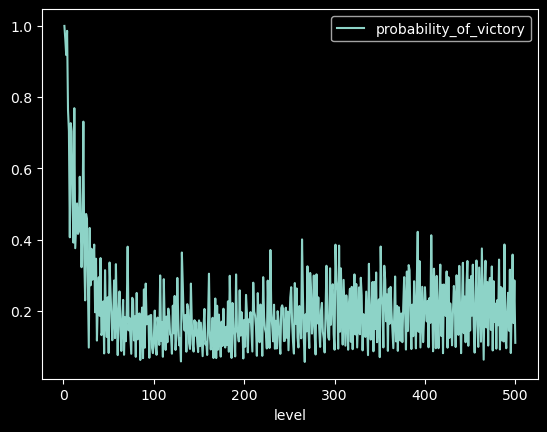

In [308]:
t.set_index('level')[['probability_of_victory']].plot()

<Axes: xlabel='level'>

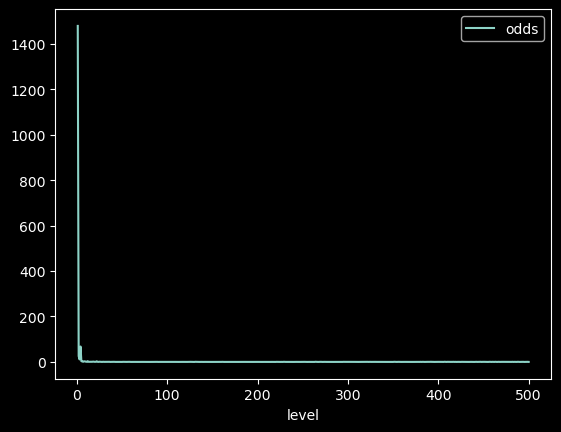

In [309]:
t.set_index('level')[['odds']].plot()

На гістограмі наш odds (шанси) розподілені таким чином, що на перших рівнях пройти гру дуже дуже великий шанс і воно затьмарило все. Подивившись в Інтернеті, що роблять люди в таких випадках, я порахував логарифмічний шанс

Це було зроблено для того, щоб побачити кращу динаміку на графіку.

In [259]:
t['logodds'] = np.log(t['odds'])

<Axes: xlabel='level'>

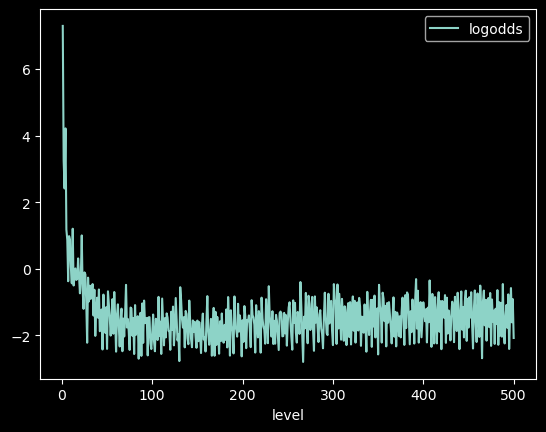

In [260]:
t.set_index('level')[['logodds']].plot()

In [310]:
t.head()

,level,count_of_users,probability_of_victory,odds
0,1,25157,0.999324,1478.823529
1,2,23313,0.962382,25.582668
2,3,23634,0.917619,11.138675
3,4,21636,0.985487,67.904459
4,5,27192,0.763791,3.233536


Пропоную перевести ймовірність до відсотків.

In [311]:
t['winning_percentage'] = (t.probability_of_victory)*100

In [312]:
t.rename(columns = {'count_of_users':'attempts'},inplace = True)

<Axes: xlabel='attempts', ylabel='winning_percentage'>

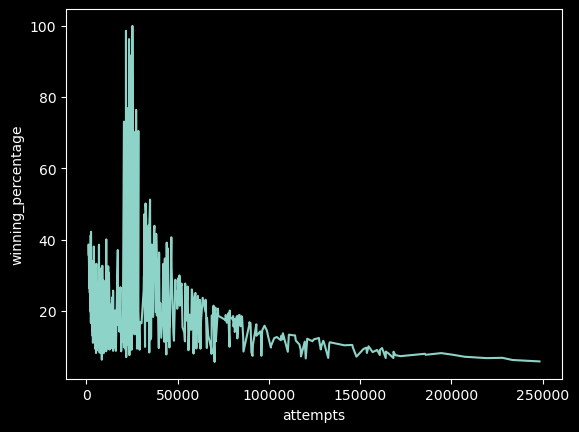

In [313]:
sns.lineplot(data = t, x ='attempts', y = 'winning_percentage')

На цьому графіку можемо побачити, що чим більше спроб, тим відсоток на виграш падає.

In [265]:
tt = df.groupby(['level','uid'])['action'].count().reset_index()

In [266]:
tt.head()

,level,uid,action
0,1,M001TWRFNWc5MjQ1MDI3MTAyMjE5MA,1
1,1,M001VTlGalU5MzcwMTI3MTAyMjE5Mg,1
2,1,M010Z2VmOFgzMzgwMTI3MTAyMjE4Mg,1
3,1,M01QQlBMVmo1NTcyODA3MTAyMjE4MQ,1
4,1,M01TMDNDdzA0MDkwNzE3MTAyMjE2MA,1


In [267]:
attempts = tt.groupby('level')['action'].agg(['count','mean','median'])

In [315]:
attempts.head()

,count,mean,median
level,,,
1,24162,1.041180,1.0
2,22177,1.051224,1.0
3,21415,1.103619,1.0
4,20916,1.034423,1.0
5,20625,1.318400,1.0


порахуємо середнє на кожен рівень гри

In [268]:
t = t.join(attempts,lsuffix='_l',rsuffix='_r')

In [269]:
t.head()

,level,attempts,probability_of_victory,odds,logodds,winning_percentage,count,mean,median
0,1,25157,0.999324,1478.823529,7.299002,99.932424,NaN,NaN,NaN
1,2,23313,0.962382,25.582668,3.241915,96.238150,24162.0,1.041180,1.0
2,3,23634,0.917619,11.138675,2.410423,91.761868,22177.0,1.051224,1.0
3,4,21636,0.985487,67.904459,4.218102,98.548715,21415.0,1.103619,1.0
4,5,27192,0.763791,3.233536,1.173576,76.379082,20916.0,1.034423,1.0


In [270]:
t.columns = ['level','level_all_attempts', 'prob_win', 'odds_win', 
             'logodds_win', 'winning_percentage','user_cnt', 'attempt_mean', 'attempt_median']

In [271]:
t.head()

,level,level_all_attempts,prob_win,odds_win,logodds_win,winning_percentage,user_cnt,attempt_mean,attempt_median
0,1,25157,0.999324,1478.823529,7.299002,99.932424,NaN,NaN,NaN
1,2,23313,0.962382,25.582668,3.241915,96.238150,24162.0,1.041180,1.0
2,3,23634,0.917619,11.138675,2.410423,91.761868,22177.0,1.051224,1.0
3,4,21636,0.985487,67.904459,4.218102,98.548715,21415.0,1.103619,1.0
4,5,27192,0.763791,3.233536,1.173576,76.379082,20916.0,1.034423,1.0


і розрахуємо ймовірність програти

In [272]:
t['prob_lose'] = 1 - t['prob_win']

In [273]:
t.head()

,level,level_all_attempts,prob_win,odds_win,logodds_win,winning_percentage,user_cnt,attempt_mean,attempt_median,prob_lose
0,1,25157,0.999324,1478.823529,7.299002,99.932424,NaN,NaN,NaN,0.000676
1,2,23313,0.962382,25.582668,3.241915,96.238150,24162.0,1.041180,1.0,0.037618
2,3,23634,0.917619,11.138675,2.410423,91.761868,22177.0,1.051224,1.0,0.082381
3,4,21636,0.985487,67.904459,4.218102,98.548715,21415.0,1.103619,1.0,0.014513
4,5,27192,0.763791,3.233536,1.173576,76.379082,20916.0,1.034423,1.0,0.236209


<Axes: xlabel='attempt_mean', ylabel='prob_lose'>

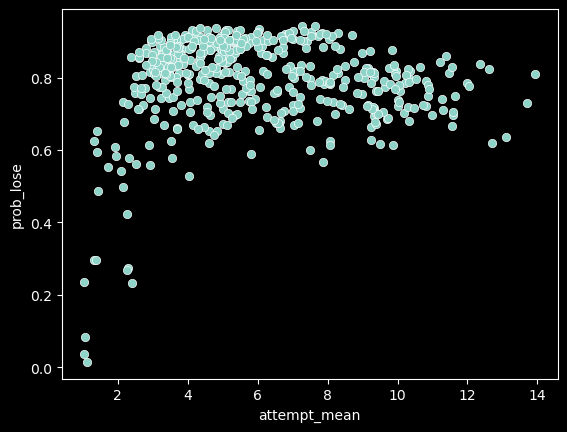

In [274]:
sns.scatterplot(data=t,x='attempt_mean',y='prob_lose')

Доволі непоганий показник: коли збільшується кількість спроб, ймовірність програти зростає. Іншими словами, ми виявили динаміку рівнів: в середньому, чим більше спроб, тим більше ми усвідомлюємо, що рівень є складним."

можна для себе визначити...завжди, коли ми розглядаємо ймовірність перемоги, ми можемо також розрахувати ймовірність програшу.

Чим більше спроб, тим рівень стає складнішим. І завжди корисно розраховувати середнє значення на одного користувача або на одну спробу.

'Difficulty' може бути визначена як відсоток поразок

Взагалі, в моєму попередньому проєкті я використовував процентилі з розрахунком, що чим більше спроб, тим рівень стає складнішим. Тут можна розділити на групи трохи іншим чином. Усього у нас буде 100 груп.

In [275]:
t['level_grp'] = t['level'] // 5

In [276]:
t['wins'] = round(t['prob_win'] * t['level_all_attempts']).astype(int)

In [277]:
t['lose'] =  round(t['prob_lose'] * t['level_all_attempts']).astype(int)

In [278]:
tt = t.groupby('level_grp')[['level_all_attempts','lose']].sum()

In [279]:
tt

,level_all_attempts,lose
level_grp,,
0,93740,3155
1,153252,56983
2,182849,97556
3,168941,90262
4,209624,134604
...,...,...
96,13379,10984
97,14024,11787
98,13476,11215


Ми поділимо наші програші на загальну кількість спроб, і побачимо, що лінія трохи спадає і ймовірність зробити помилки на якомусь етапі стає меншою. Загугливши специфіку цих ігор, цих видів гри, це може бути пов'язано з таким моментом, що на початкових рівнях гри гравець може легко подолати перешкоди та виконувати завдання без особливих зусиль. Однак у міру просування гравця його навички стають більш вимогливими та точними. Це може створити відчуття, що гра стає складнішою, хоча насправді гравець просто стає більш вимогливим до себе.

In [280]:
tt['prob_lose'] = tt['lose'] / tt['level_all_attempts']

<Axes: xlabel='level_grp'>

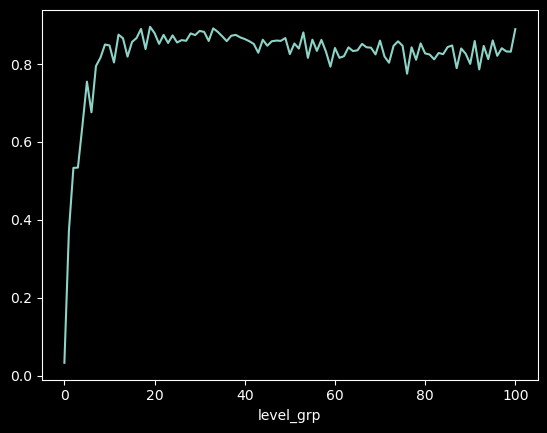

In [281]:
tt['prob_lose'].plot(grid=False)

Це кінець, друзі, на цьому тестовому завданні. Особливо нічого я не зробив, але деякі нові речі я для себе запам'ятав і захотів таким чином викласти це до свого портфоліо, а також поділитися з вами. Сподіваюся, вам було цікаво. Завжди відкритий до ваших думок та зауважень.